In [25]:
# Import depedencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
# from imblearn.metrics import classification_report_imbalanced


# Read the CSV and Perform Basic Data Cleaning

In [2]:
#Load data
file_path = Path('../Final_Project_Resources/final.csv')
df = pd.read_csv (file_path)
df.head()



,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean


In [3]:
# Convert the 'GDP' column into log10
df['GDP_log10'] = np.log10(df['GDP'])

In [4]:
df.head()

,date,currency_code,Country,local_price,dollar_ex,dollar_price,Year,Code,gdp_growth,GDP_Per_Capita,GDP,country_code,region,sub_region,GDP_log10
0,2000-04-01,ARS,Argentina,2.50,1,2.50,2000,ARG,-10.894485,6854.294081,2.582818e+11,32.0,Americas,Latin America and the Caribbean,11.412094
1,2000-04-01,AUD,Australia,2.59,1,2.59,2000,AUS,4.001431,45806.687448,9.001655e+11,36.0,Oceania,Australia and New Zealand,11.954322
2,2000-04-01,BRL,Brazil,2.95,1,2.95,2000,BRA,3.053462,8954.837245,1.607729e+12,76.0,Americas,Latin America and the Caribbean,12.206213
3,2000-04-01,CAD,Canada,2.85,1,2.85,2000,CAN,3.016889,44863.216018,1.406914e+12,124.0,Americas,Northern America,12.148268
4,2000-04-01,CLP,Chile,1260.00,514,2.45,2000,CHL,3.106971,9814.656135,1.539371e+11,152.0,Americas,Latin America and the Caribbean,11.187343


In [5]:
df.describe()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,country_code,GDP_log10
count,9.200000e+02,9.200000e+02,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000
mean,1.393870e+04,5.331433e+03,3.567609,2010.279348,3.070198,26113.144578,1.342889e+12,438.443478,11.678427
std,2.225534e+05,8.499408e+04,1.517102,4.525734,3.220871,22923.009189,2.847060e+12,258.334203,0.576048
min,2.040000e+00,1.000000e+00,0.800000,2000.000000,-14.758545,970.941956,2.229865e+10,32.000000,10.348279
25%,4.675000e+00,1.000000e+00,2.497500,2007.000000,1.601224,7495.754301,2.108129e+11,188.000000,11.323895
50%,1.395000e+01,5.000000e+00,3.330000,2012.000000,2.850864,14771.257645,3.945133e+11,416.000000,11.596062
75%,8.550000e+01,3.825000e+01,4.290000,2014.000000,4.789940,46498.842667,1.041007e+12,682.000000,12.017448
max,4.000000e+06,1.600500e+06,11.250000,2016.000000,25.162533,92121.421135,1.784427e+13,858.000000,13.251499


# Testing ML to a single country

In [6]:
# Creating a new Dataframe containing entries from Argentina
df_Argentina = df.loc[df['Country'] == "Argentina"]

In [50]:
df_Argentina.count()

date              25
currency_code     25
Country           25
local_price       25
dollar_ex         25
dollar_price      25
Year              25
Code              25
gdp_growth        25
GDP_Per_Capita    25
GDP               25
country_code      25
region            25
sub_region        25
GDP_log10         25
dtype: int64

# Applying Linear Regression Model

In [8]:
X = df_Argentina.GDP_log10.values.reshape(-1,1)
y = df_Argentina.dollar_price.values.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [10]:
# training the model
model.fit(X,y)

LinearRegression()

In [11]:
y_pred = model.predict(X)

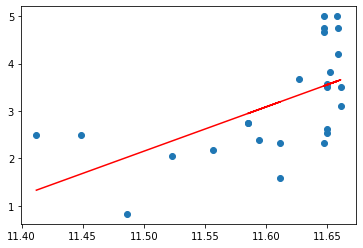

In [12]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# Applying RandomForest Regressor to Argentina

In [23]:
df_Argentina_modified = df_Argentina.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis =1)

In [83]:
# Defining Feature(X) and variable (y)
X = df_Argentina_modified
y = df_Argentina_modified.dollar_price

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [85]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [86]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [87]:
y_pred =model.predict(X_test)

In [88]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.312


# Applying RandomForest Regressor using multiple feature

In [90]:
df_values = df.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis=1)

In [91]:
df_values.head()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2.59,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343


In [92]:
X = df_values.drop('dollar_price', axis=1)
X

,local_price,dollar_ex,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2000,3.106971,9814.656135,1.539371e+11,11.187343
...,...,...,...,...,...,...,...
915,10.75,3,2016,2.566623,15026.707518,1.236994e+12,12.092368
916,39.00,24,2016,3.335489,3110.194646,1.314673e+11,11.118818
917,4.50,1,2016,2.856988,54541.720518,1.784427e+13,13.251499
918,123.00,30,2016,1.620084,14617.464001,5.042000e+10,10.702603


In [93]:
y = df_values['dollar_price']

In [95]:
len(df_values)

920

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [97]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [98]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
y_pred =model.predict(X_test)

In [100]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.443


In [ ]:
# Applying ML to Canada

In [101]:
# Creating a new Dataframe containing entries from Argentina
df_Canada = df.loc[df['Country'] == "Canada"]

In [103]:
len(df_Canada)

25

# Applying Linear Regression Model

In [104]:
X = df_Canada.GDP_log10.values.reshape(-1,1)
y = df_Canada.dollar_price.values.reshape(-1,1)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# Instantiate linear regression model
model = LinearRegression()


In [106]:
# training the model
model.fit(X,y)

LinearRegression()

In [107]:
y_pred = model.predict(X)

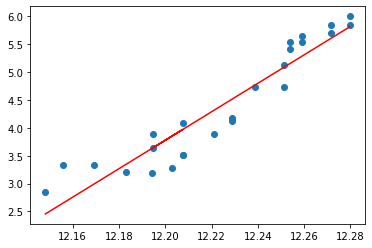

In [108]:
# Creating a scatter plot with a regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

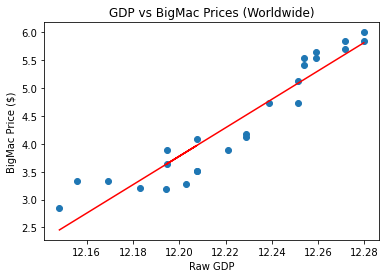

In [109]:
# Scatter plot including the regression curve
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.title('GDP vs BigMac Prices (Worldwide)')
plt.xlabel('Raw GDP')
plt.ylabel('BigMac Price ($)')
plt.show()

In [110]:
# R-square for the model
print(model.score(X,y))

0.8913158240296158


In [ ]:
# Applying RandomForest Regressor to Canada

In [111]:
df_Canada_modified = df_Canada.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis =1)

In [118]:
# Defining Feature(X) and variable (y)
X = df_Canada_modified
y = df_Canada_modified.dollar_price

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [120]:
model = RandomForestRegressor(n_estimators= 25, random_state= 0)

In [121]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [122]:
y_pred =model.predict(X_test)

In [123]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.122


# Applying RandomForest Regressor using multiple feature

In [90]:
df_values = df.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis=1)

In [91]:
df_values.head()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2.59,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343


In [92]:
X = df_values.drop('dollar_price', axis=1)
X

,local_price,dollar_ex,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2000,3.106971,9814.656135,1.539371e+11,11.187343
...,...,...,...,...,...,...,...
915,10.75,3,2016,2.566623,15026.707518,1.236994e+12,12.092368
916,39.00,24,2016,3.335489,3110.194646,1.314673e+11,11.118818
917,4.50,1,2016,2.856988,54541.720518,1.784427e+13,13.251499
918,123.00,30,2016,1.620084,14617.464001,5.042000e+10,10.702603


In [93]:
y = df_values['dollar_price']

In [95]:
len(df_values)

920

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [97]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [98]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
y_pred =model.predict(X_test)

In [100]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.443


# Applying RandomForest Regressor to Argentina

In [23]:
df_Argentina_modified = df_Argentina.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis =1)

In [83]:
# Defining Feature(X) and variable (y)
X = df_Argentina_modified
y = df_Argentina_modified.dollar_price

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [85]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [86]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [87]:
y_pred =model.predict(X_test)

In [88]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.312


# Applying RandomForest Regressor using multiple feature

In [90]:
df_values = df.drop(['date','currency_code', 'Country', 'Code', 'country_code', 'region', 'sub_region'], axis=1)

In [91]:
df_values.head()

,local_price,dollar_ex,dollar_price,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2.50,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2.59,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2.95,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2.85,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2.45,2000,3.106971,9814.656135,1.539371e+11,11.187343


In [92]:
X = df_values.drop('dollar_price', axis=1)
X

,local_price,dollar_ex,Year,gdp_growth,GDP_Per_Capita,GDP,GDP_log10
0,2.50,1,2000,-10.894485,6854.294081,2.582818e+11,11.412094
1,2.59,1,2000,4.001431,45806.687448,9.001655e+11,11.954322
2,2.95,1,2000,3.053462,8954.837245,1.607729e+12,12.206213
3,2.85,1,2000,3.016889,44863.216018,1.406914e+12,12.148268
4,1260.00,514,2000,3.106971,9814.656135,1.539371e+11,11.187343
...,...,...,...,...,...,...,...
915,10.75,3,2016,2.566623,15026.707518,1.236994e+12,12.092368
916,39.00,24,2016,3.335489,3110.194646,1.314673e+11,11.118818
917,4.50,1,2016,2.856988,54541.720518,1.784427e+13,13.251499
918,123.00,30,2016,1.620084,14617.464001,5.042000e+10,10.702603


In [93]:
y = df_values['dollar_price']

In [95]:
len(df_values)

920

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 28)

In [97]:
model = RandomForestRegressor(n_estimators= 10, random_state= 0)

In [98]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [99]:
y_pred =model.predict(X_test)

In [100]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)

0.443


TypeError: unhashable type: 'numpy.ndarray'

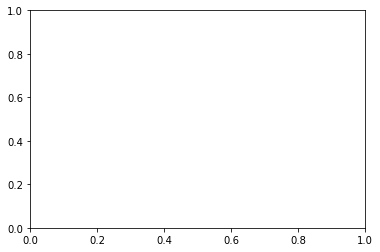

In [19]:
# Ploting the data as a scatter plot using GDP
plt.scatter(X, y)
plt.xlabel('GDP')
plt.ylabel('BigMac Price ($)')
plt.title('GDP vs BigMac Price (Worldwide)')
plt.show()

In [ ]:
# # Define independent variable, I am using the log(GDP)
# X =df.GDP_log10.values.reshape(-1,1)

In [ ]:
# # Define dependent variable, I am assuming that the column header will be "price"
# y= df.dollar_price.values.reshape(-1,1)

In [ ]:
# scaler = StandardScaler()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
# # Instantiate linear regression model
# model = LinearRegression()


In [ ]:
# # training the model
# model.fit(X,y)

In [ ]:
# y_pred = model.predict(X)

In [ ]:
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [ ]:
# print(model.coef_)
# print(model.intercept_)

In [ ]:
# print(model.score(X,y))

# Using 2nd Polynomial

In [ ]:
# Import dependencies
from sklearn.preprocessing import PolynomialFeatures

# Save an instance of Polynomial Feature
poly = PolynomialFeatures(degree=2, include_bias=True)

In [ ]:
# poly_features = poly.fit_transform(X.reshape(-1,1))

In [ ]:
# y

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
# poly_reg_model = LinearRegression()

In [ ]:
# poly_reg_model.fit(X_train, y_train)

In [ ]:
# y_predicted = poly_reg_model.predict(X_test)
# y_predicted

In [ ]:
# from sklearn.metrics import mean_squared_error

In [ ]:
# poly_reg_rmse = np.sqrt(mean_squared_error(y_test,
#                                           y_predicted))
# poly_reg_rmse

In [ ]:
# plt.figure(figsize= (10,6))
# plt.title("Polynomial Reg", size=16)
# plt.scatter(X, y)
# plt.plot(X, y_predicted, c='red')
# plt.show()

# Lets try RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# X =df.GDP_log10.values.reshape(-1,1)
# y= df.dollar_price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [ ]:
# Creating a StandardScalar instance
scaler = StandardScaler()

# Fitting the Standard Scalar with the training data
X_scalar = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [ ]:
# Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the accuracy score
mse = mean_squared_error(y_test, predictions)

rmse = mse**0.5

print(mse)
print(rmse)

In [ ]:
# Calculate feature importance in Random Forest Model
importance = rf_model.feature_importances_
importance